In [5]:
import numpy as np
import pylab

import lalsimulation as lalsim
import pycbc
from pycbc import waveform

In [6]:
hp1, hc1 = waveform.get_td_waveform(approximant="SEOBNRv3",
                                 mass1=14, mass2=11,
                                  spin1z=0.5, spin2z=-0.5,
                                  delta_t=1.0/4096,
                         
                                    f_lower=20)

hp2, hc2 = waveform.get_td_waveform(approximant="SEOBNRv4",
                                 mass1=24, mass2=13,
                                  spin1z=0.2, spin2z=-0.2,
                                  delta_t=1.0/4096,
                                  f_lower=20)

# Resize the waveforms to the same length
tlen = max(len(hp1), len(hp2))
hp1.resize(tlen)
hp2.resize(tlen)

['AdVBNSOptimizedSensitivityP1200087', 'AdVDesignSensitivityP1200087', 'AdVEarlyHighSensitivityP1200087', 'AdVEarlyLowSensitivityP1200087', 'AdVLateHighSensitivityP1200087', 'AdVLateLowSensitivityP1200087', 'AdVMidHighSensitivityP1200087', 'AdVMidLowSensitivityP1200087', 'AdvVirgo', 'CosmicExplorerP1600143', 'CosmicExplorerPessimisticP1600143', 'CosmicExplorerWidebandP1600143', 'EinsteinTelescopeP1600143', 'GEO', 'GEOHF', 'KAGRA', 'KAGRADesignSensitivityT1600593', 'KAGRAEarlySensitivityT1600593', 'KAGRALateSensitivityT1600593', 'KAGRAMidSensitivityT1600593', 'KAGRAOpeningSensitivityT1600593', 'TAMA', 'Virgo', 'aLIGOAPlusDesignSensitivityT1800042', 'aLIGOAdVO3LowT1800545', 'aLIGOAdVO4IntermediateT1800545', 'aLIGOAdVO4T1800545', 'aLIGOBHBH20Deg', 'aLIGOBHBH20DegGWINC', 'aLIGOBNSOptimizedSensitivityP1200087', 'aLIGODesignSensitivityP1200087', 'aLIGOEarlyHighSensitivityP1200087', 'aLIGOEarlyLowSensitivityP1200087', 'aLIGOHighFrequency', 'aLIGOHighFrequencyGWINC', 'aLIGOKAGRA128MpcT1800545'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


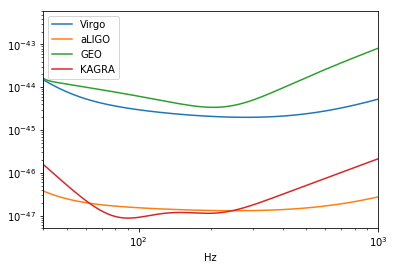

match (psd=none): 0.16298089010913358
match (psd=Virgo): 0.23661210973878025
match (psd=LIGO): 0.14827123670069564
match (psd=GEO): 0.23389016374371988
match (psd=KAGRA): 0.30847361206345963


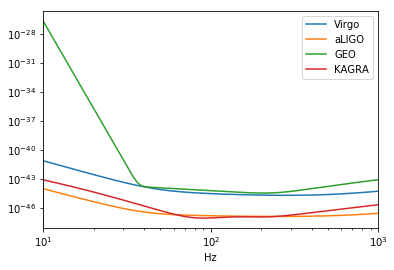

In [7]:
from pycbc.filter import match
import pycbc.psd
import pylab

# List the available analytic psds
print(pycbc.psd.get_lalsim_psd_list())

flength = tlen//2 + 1
delta_f = 1.0 / hp1.duration

#---------------
# LOW FREQUENCY CUTOFF = 40.0
#---------------

low_frequency_cutoff = 40.0


#now we compute the match for different psds:

m1, i = match(hp1, hp2, low_frequency_cutoff=low_frequency_cutoff) #psd = none
print('match (psd=none):', m1)

p2 = pycbc.psd.Virgo(flength, delta_f, low_frequency_cutoff)
m2, j = match(hp1, hp2, psd=p2, low_frequency_cutoff=low_frequency_cutoff) #psd = Virgo
print('match (psd=Virgo):', m2)

p3 = pycbc.psd.aLIGOZeroDetHighPower(flength, delta_f, low_frequency_cutoff)
m3, j = match(hp1, hp2, psd=p3, low_frequency_cutoff=low_frequency_cutoff) #psd = aLIGOZeroDetHighPower
print('match (psd=aLIGOZeroDetHighPower):', m3)

p4 = pycbc.psd.GEO(flength, delta_f, low_frequency_cutoff)
m4, j = match(hp1, hp2, psd=p4, low_frequency_cutoff=low_frequency_cutoff) #psd = GEO
print('match (psd=GEO):', m4)

p5 = pycbc.psd.KAGRA(flength, delta_f, low_frequency_cutoff)
m5, j = match(hp1, hp2, psd=p5, low_frequency_cutoff=low_frequency_cutoff) #psd = KAGRA
print('match (psd=KAGRA):', m5)

pylab.loglog(p2.sample_frequencies, p2, label='Virgo')
pylab.loglog(p3.sample_frequencies, p3, label='aLIGO')
pylab.loglog(p4.sample_frequencies, p4, label='GEO')
pylab.loglog(p5.sample_frequencies, p5, label='KAGRA')
pylab.xlim(xmin=low_frequency_cutoff, xmax=1000)
pylab.legend()
pylab.xlabel('Hz')
pylab.show()


#---------------
# LOW FREQUENCY CUTOFF = 10.0
#---------------


low_frequency_cutoff = 10.0
#now we compute the match for different psds:

m1, i = match(hp1, hp2, low_frequency_cutoff=low_frequency_cutoff) #psd = none
print('match (psd=none):', m1)

p2 = pycbc.psd.Virgo(flength, delta_f, low_frequency_cutoff)
m2, j = match(hp1, hp2, psd=p2, low_frequency_cutoff=low_frequency_cutoff) #psd = Virgo
print('match (psd=Virgo):', m2)

p3 = pycbc.psd.aLIGOZeroDetHighPower(flength, delta_f, low_frequency_cutoff)
m3, j = match(hp1, hp2, psd=p3, low_frequency_cutoff=low_frequency_cutoff) #psd = aLIGOZeroDetHighPower
print('match (psd=LIGO):', m3)

p4 = pycbc.psd.GEO(flength, delta_f, low_frequency_cutoff)
m4, j = match(hp1, hp2, psd=p4, low_frequency_cutoff=low_frequency_cutoff) #psd = GEO
print('match (psd=GEO):', m4)

p5 = pycbc.psd.KAGRA(flength, delta_f, low_frequency_cutoff)
m5, j = match(hp1, hp2, psd=p5, low_frequency_cutoff=low_frequency_cutoff) #psd = KAGRA
print('match (psd=KAGRA):', m5)

pylab.loglog(p2.sample_frequencies, p2, label='Virgo')
pylab.loglog(p3.sample_frequencies, p3, label='aLIGO')
pylab.loglog(p4.sample_frequencies, p4, label='GEO')
pylab.loglog(p5.sample_frequencies, p5, label='KAGRA')
pylab.xlim(xmin=low_frequency_cutoff, xmax=1000)
pylab.legend()
pylab.xlabel('Hz')
pylab.show()